In [1]:
import sys
sys.path.append('/u/ajagadish/ermi/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
from mycolorpy import colorlist as mcp
import math
import matplotlib as mpl
FONTSIZE=20
SYS_PATH = '/u/ajagadish/ermi' 

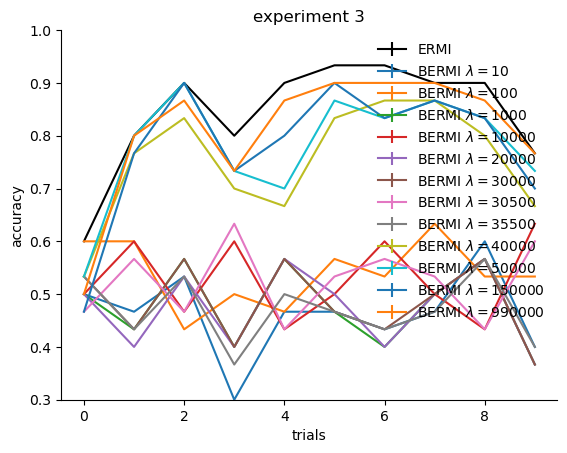

In [4]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [10, 100, 1000, 10000, 20000, 30000, 30500, 35500, 40000, 50000, 150000, 990000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

/tmp/ipykernel_8335/3961042789.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


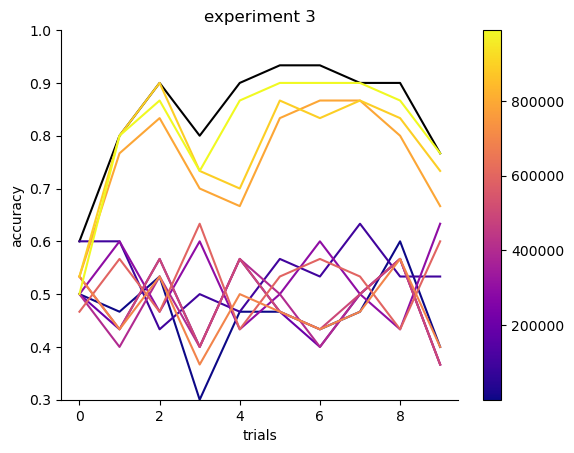

In [3]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

cmap = mpl.colormaps['plasma']
dls = [10, 100, 1000, 10000, 20000, 30000, 30500, 35500, 40000, 50000, 990000] #np.arange(30000, 40000, 500)
colors = cmap(np.linspace(0, 1, len(dls)))

for (c, ess) in zip(colors,dls):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0), 
                 yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks),
                 label=f'BERMI $\lambda={str(ess)}$',
                 color=c)

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend('', frameon=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=dls[0], vmax=dls[-1])
plt.colorbar(sm)
plt.show()

/tmp/ipykernel_8335/2141348149.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


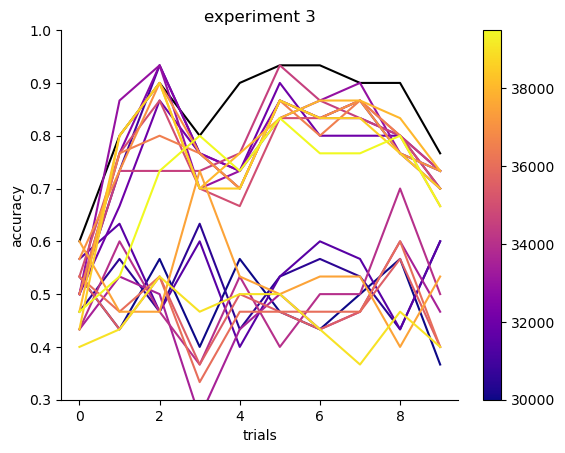

In [4]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

cmap = mpl.colormaps['plasma']
dls = np.arange(30000, 40000, 500)
colors = cmap(np.linspace(0, 1, len(dls)))

for (c, ess) in zip(colors,dls):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0), 
                 yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks),
                 label=f'BERMI $\lambda={str(ess)}$',
                 color=c)

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend('', frameon=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=dls[0], vmax=dls[-1])
plt.colorbar(sm)
plt.show()

In [5]:
accs = []
logs = []
esses = [] #[1, 10, 100, 1000]
# esses.extend([i for i in np.arange(10000, 100000, 10000)])
esses.extend([i for i in np.arange(30000, 40000, 100)])
lambdas = []
experiment_id=3
for ess in esses:
    try:
        results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=bernoulli_ess={str(int(ess))}.npz')
        accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0).mean())
        logs.append(results_bermi_paired_ess['expected_log_likelihood'].sum(1).mean(0).mean())
        lambdas.append(ess)
    except:
        print(ess)

30000


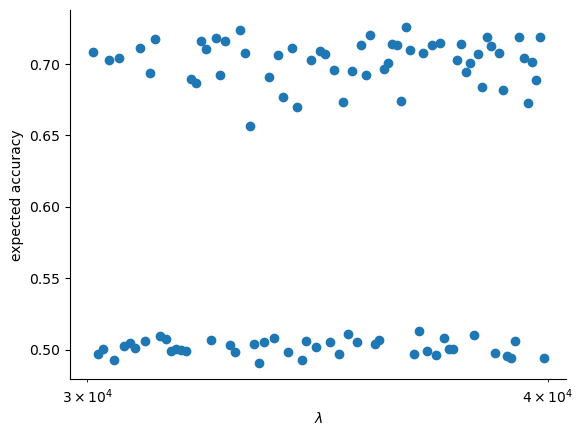

In [6]:
plt.scatter(lambdas, accs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('expected accuracy')
sns.despine()

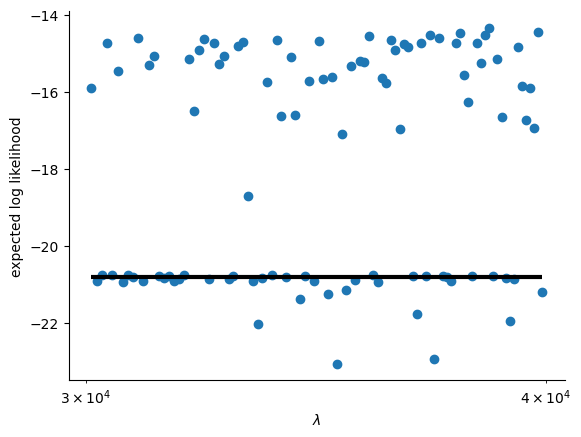

In [7]:
plt.scatter(lambdas, logs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('expected log likelihood')
plt.hlines(np.log(1/2)*30, xmin=lambdas[0], xmax=lambdas[-1], color='k', lw=3)
sns.despine()

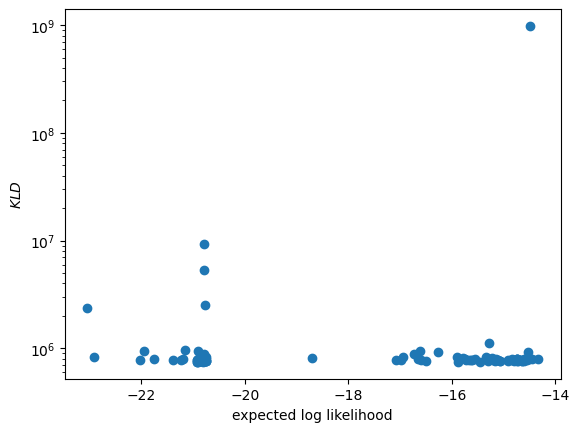

In [22]:
#save_klds(data='claude_generated_functionlearningtasks_paramsNA_dim2_data20_tasks9254_run0_procid0_pversion2_unknown', env='claude_dim2', max_steps=10, num_inputs=2)
data_klds = pd.read_csv('/u/ajagadish/ermi/decisionmaking/data/stats/klds_claude_dim2.csv')
plt.scatter(logs, data_klds.kld.values[4:-6])
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('expected log likelihood')
plt.ylabel('$KLD$')
plt.show()

In [87]:
experiment_id=1
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_rank = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=rank_loss=nll_paired=True_policy=greedy_ess=NA.npz')
results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=NA.npz')
results_mi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=synthetic_condition=unknown_loss=nll_paired=True_policy=greedy_ess=NA.npz')


plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI (Unknown)')
plt.errorbar(x=np.arange(10), y=(results_mi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_mi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='MI')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_human_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_rank['human_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), c='k', lw=2, label='Human')
             
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=rank_loss=nll_paired=True_policy=greedy_ess=NA.npz'

In [ ]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
ginis_ermi = np.zeros_like(results_ermi_paired_rank['model_coefficients'][...,[0]])
ginis_ermi_unknown = np.zeros_like(results_ermi_paired_rank['model_coefficients'][...,[0]])
ginis_mi = np.zeros_like(results_mi_paired_unknown['model_coefficients'][...,[0]])
for participant in range(results_ermi_paired_rank['model_coefficients'].shape[0]):
    for task in range(results_ermi_paired_rank['model_coefficients'].shape[1]):
        for trial in range(results_ermi_paired_rank['model_coefficients'].shape[2]):
            ginis_ermi[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_rank['model_coefficients'][participant, task, trial]))
            ginis_ermi_unknown[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_unknown['model_coefficients'][participant, task, trial]))
            ginis_mi[participant, task, trial]= gini_compute(np.abs(results_mi_paired_unknown['model_coefficients'][participant, task, trial]))

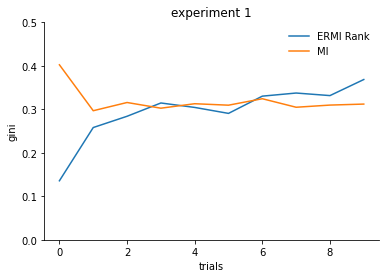

In [22]:
plt.plot(ginis_ermi.squeeze().mean(1).mean(0), label='ERMI Rank')
plt.plot(ginis_mi.squeeze().mean(1).mean(0), label='MI')
# plt.plot(ginis_ermi_unknown.squeeze().mean(1).mean(0), label='ERMI Unknown')
plt.ylim([0., 0.5])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

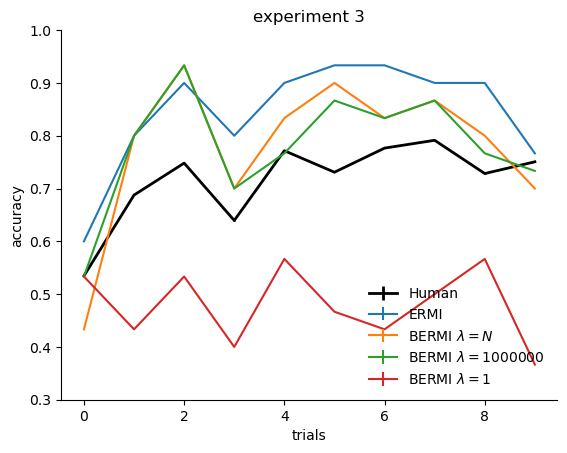

In [21]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
results_bermi_paired_ess1 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_essNone.npz')
results_bermi_paired_ess2 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess1000000.0.npz')
results_bermi_paired_ess3 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz')

plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_human_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['human_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), c='k', lw=2, label='Human')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess1['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess1['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=N$')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess2['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess2['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=1000000$')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess3['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess3['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=1$')

                                    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

In [23]:
results_bermi_paired_ess3.__dict__

{'_files': ['model_accuracy.npy',
  'per_trial_model_accuracy.npy',
  'human_accuracy.npy',
  'per_trial_human_accuracy.npy',
  'model_coefficients.npy'],
 'files': ['model_accuracy',
  'per_trial_model_accuracy',
  'human_accuracy',
  'per_trial_human_accuracy',
  'model_coefficients'],
 'allow_pickle': False,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x15023be8fd60>,
 'fid': <_io.BufferedReader name='/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz'>}

In [14]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
ginis_ermi = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
ginis_bermi_N = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
ginis_bermi_1 = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
for participant in range(results_ermi_paired_unknown['model_coefficients'].shape[0]):
    for task in range(results_ermi_paired_unknown['model_coefficients'].shape[1]):
        for trial in range(results_ermi_paired_unknown['model_coefficients'].shape[2]):
            ginis_ermi[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_unknown['model_coefficients'][participant, task, trial]))
            ginis_bermi_N[participant, task, trial]= gini_compute(np.abs(results_bermi_paired_ess1['model_coefficients'][participant, task, trial]))
            ginis_bermi_1[participant, task, trial]= gini_compute(np.abs(results_bermi_paired_ess3['model_coefficients'][participant, task, trial]))

plt.plot(ginis_ermi.squeeze().mean(1).mean(0), label='ERMI')
plt.plot(ginis_bermi_N.squeeze().mean(1).mean(0), label='BERMI $\lambda=N$')
plt.plot(ginis_bermi_1.squeeze().mean(1).mean(0), label='BERMI $\lambda=1$')
plt.ylim([0., 0.5])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

KeyError: 'model_coefficients is not a file in the archive'